In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Goal:
- Develop a generic markdown pricing strategy for a retailer to maximize the total revenue when selling some inventory over a
limited time period of 15 weeks

### Historical dataset characteristics:
- initial stock is 2000 units
- initial price at the first week: 60$
- Four possible price levels:
• Initial price of $60
• 10% off ($54)
• 20% off ($48)
• 40% off ($36)

In [7]:
sales = pd.read_excel('/Users/sheidamajidi/Desktop/Summer2024/MGSC670/G-HW1/retailer_game/data/Sales-Data.xlsx')

/Users/sheidamajidi/anaconda3/lib/python3.11/site-packages/openpyxl/worksheet/_reader.py:329: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


In [8]:
sales

,Item,Week,Price,Sales,Remaining Inventory
0,1.0,1.0,60.0,57.0,1943.0
1,NaN,2.0,60.0,98.0,1845.0
2,NaN,3.0,60.0,55.0,1790.0
3,NaN,4.0,60.0,41.0,1749.0
4,NaN,5.0,60.0,60.0,1689.0
...,...,...,...,...,...
248,NaN,11.0,36.0,116.0,1142.0
249,NaN,12.0,36.0,152.0,990.0
250,NaN,13.0,36.0,188.0,802.0
251,NaN,14.0,36.0,244.0,558.0


### Exploratory Data Analysis

In [10]:
# split the dataset into individual trials based on NaN rows
trials = []
current_trial = []
for _, row in sales.iterrows():
    if row.isna().all():
        if current_trial:
            trials.append(pd.DataFrame(current_trial))
            current_trial = []
    else:
        current_trial.append(row)
if current_trial:
    trials.append(pd.DataFrame(current_trial))


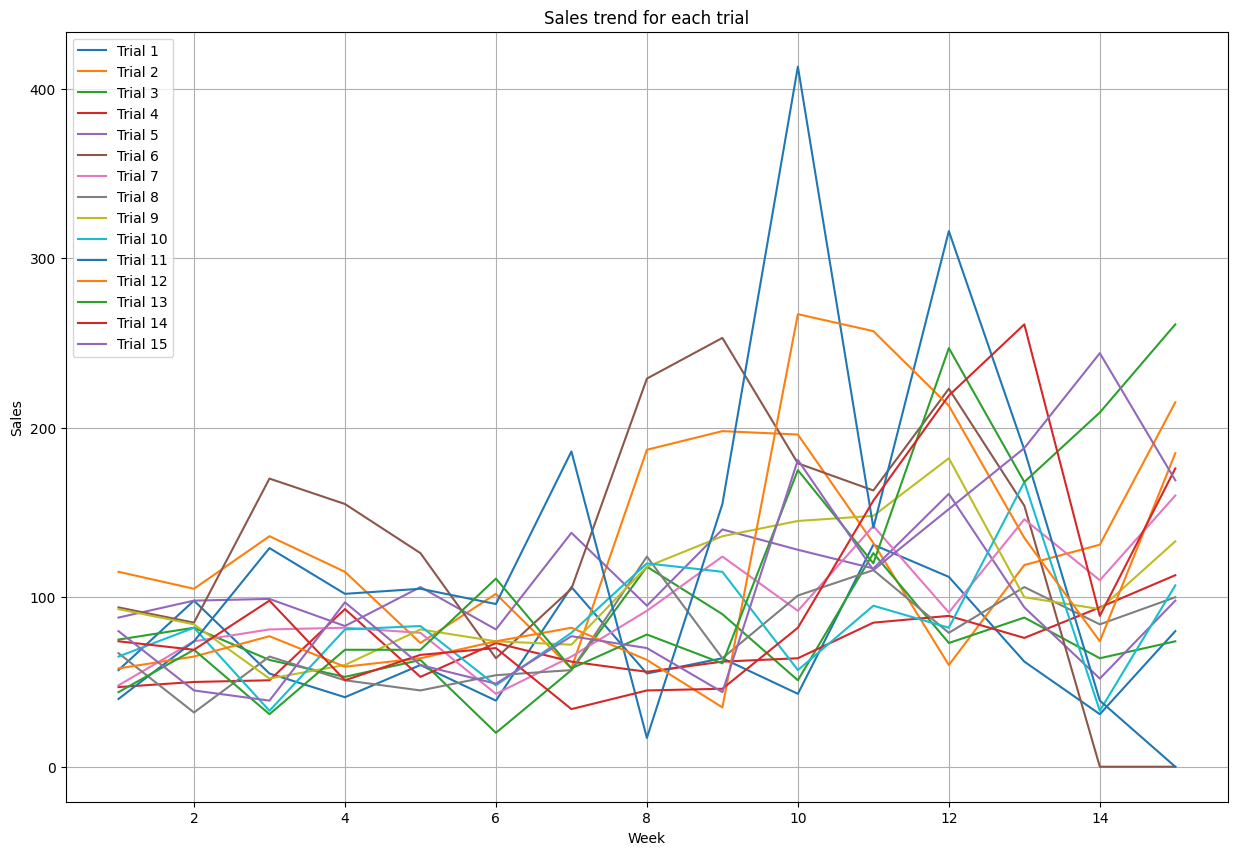

In [11]:
plt.figure(figsize=(15, 10))

for i, trial in enumerate(trials, start=1):
    plt.plot(trial['Week'], trial['Sales'], label=f'Trial {i}')

plt.xlabel('Week')
plt.ylabel('Sales')
plt.title('Sales trend for each trial')
plt.legend()
plt.grid(True)
plt.show()

/var/folders/zh/7hbjyl3x1y953yvj5t_7dbbw0000gn/T/ipykernel_31724/2551406071.py:13: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations.
  plt.tight_layout()


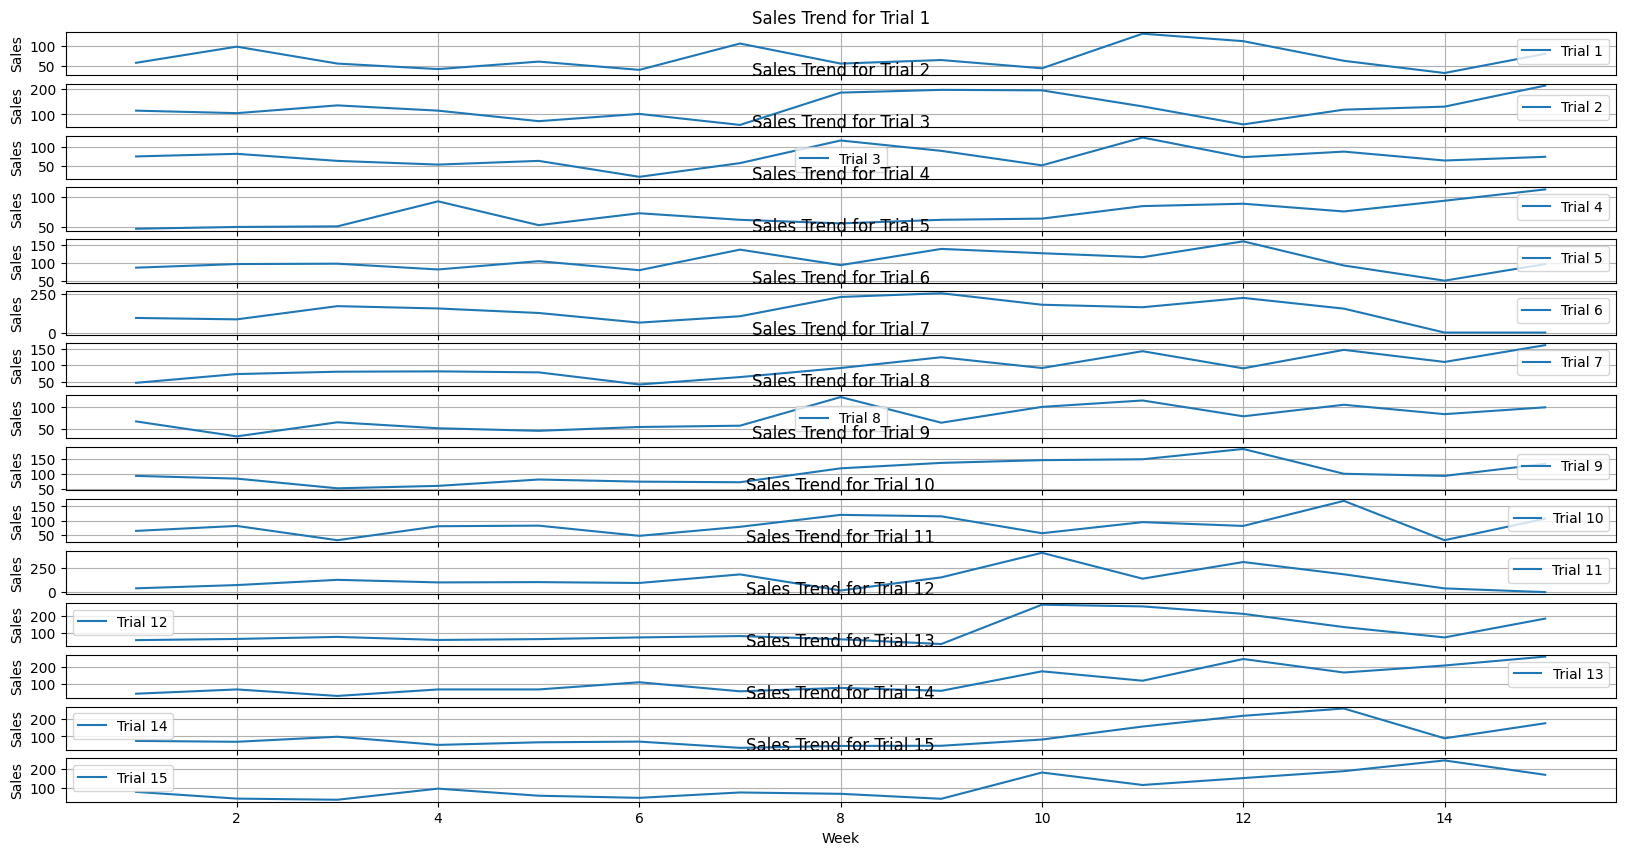

In [12]:
num_trials = len(trials)
plt.figure(figsize=(20, 10))

for i, trial in enumerate(trials, start=1):
    plt.subplot(num_trials, 1, i)
    plt.plot(trial['Week'], trial['Sales'], label=f'Trial {i}')
    plt.xlabel('Week')
    plt.ylabel('Sales')
    plt.title(f'Sales Trend for Trial {i}')
    plt.legend()
    plt.grid(True)

plt.tight_layout()
plt.show()


In [13]:
# new column to each trial dataframe indicating the price level change
def determine_price_level_change(trial_df):
    initial_price = 60
    price_levels = {
        60: 'Full Price',
        54: '10% Discount',
        48: '20% Discount',
        36: '40% Discount'
    }
    changes = []

    for idx, row in trial_df.iterrows():
        if idx == 0:
            changes.append(price_levels[row['Price']])
        else:
            if row['Price'] == initial_price:
                changes.append('Maintained Full Price')
            elif row['Price'] == 54:
                changes.append('10% Discount')
            elif row['Price'] == 48:
                changes.append('20% Discount')
            elif row['Price'] == 36:
                changes.append('40% Discount')
            initial_price = row['Price']
    
    trial_df['Price Level Change'] = changes
    return trial_df


Trial 1:
    Week  Price     Price Level Change
0    1.0   60.0             Full Price
1    2.0   60.0  Maintained Full Price
2    3.0   60.0  Maintained Full Price
3    4.0   60.0  Maintained Full Price
4    5.0   60.0  Maintained Full Price
5    6.0   60.0  Maintained Full Price
6    7.0   54.0           10% Discount
7    8.0   54.0  Maintained Full Price
8    9.0   54.0  Maintained Full Price
9   10.0   54.0  Maintained Full Price
10  11.0   54.0  Maintained Full Price
11  12.0   54.0  Maintained Full Price
12  13.0   54.0  Maintained Full Price
13  14.0   54.0  Maintained Full Price
14  15.0   54.0  Maintained Full Price


Trial 2:
    Week  Price     Price Level Change
17   1.0   60.0  Maintained Full Price
18   2.0   60.0  Maintained Full Price
19   3.0   60.0  Maintained Full Price
20   4.0   60.0  Maintained Full Price
21   5.0   60.0  Maintained Full Price
22   6.0   60.0  Maintained Full Price
23   7.0   54.0           10% Discount
24   8.0   54.0  Maintained Full Price
25   

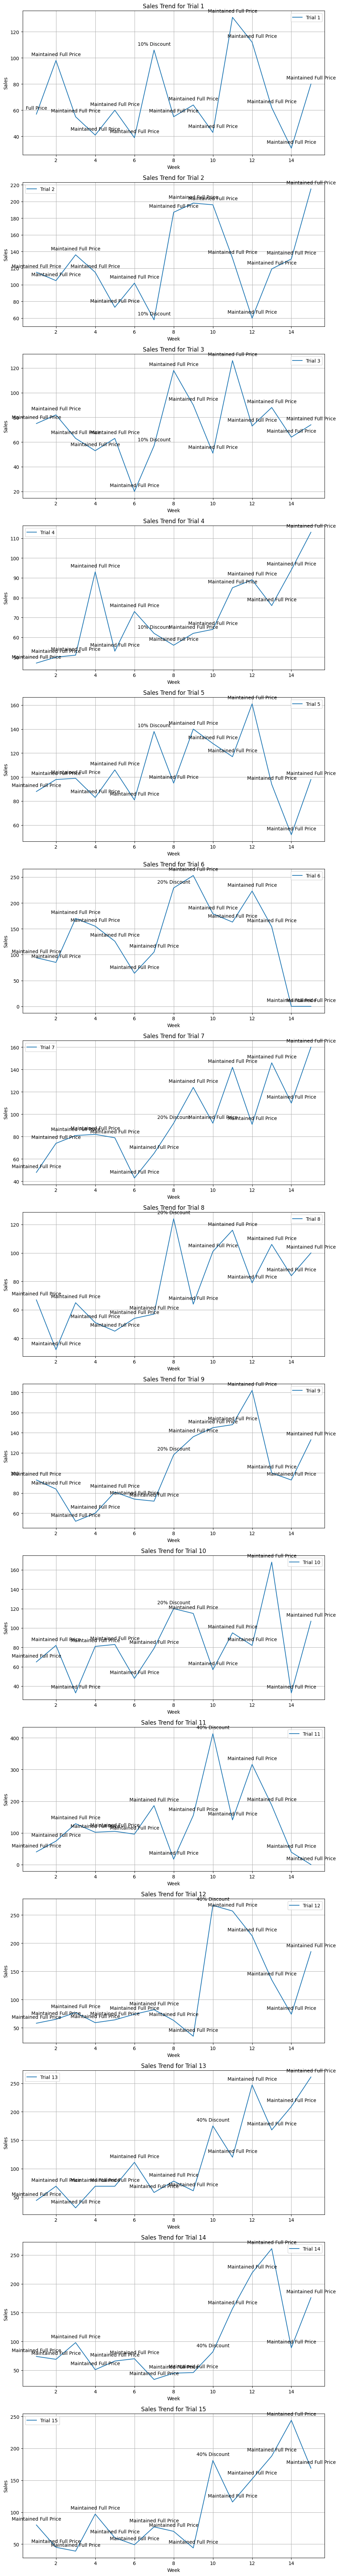

In [14]:
trials = [determine_price_level_change(trial) for trial in trials]

# 'Price Level Change' column added
for i, trial in enumerate(trials, start=1):
    print(f"Trial {i}:")
    print(trial[['Week', 'Price', 'Price Level Change']])
    print("\n")

fig, axs = plt.subplots(num_trials, 1, figsize=(10, 5 * num_trials))

for i, (trial, ax) in enumerate(zip(trials, axs), start=1):
    ax.plot(trial['Week'], trial['Sales'], label=f'Trial {i}')
    for idx, row in trial.iterrows():
        ax.annotate(row['Price Level Change'], (row['Week'], row['Sales']), textcoords="offset points", xytext=(0,10), ha='center')
    ax.set_xlabel('Week')
    ax.set_ylabel('Sales')
    ax.set_title(f'Sales Trend for Trial {i}')
    ax.legend()
    ax.grid(True)

plt.tight_layout()
plt.show()


### Results from historical data:

- Trials 1, 2, 3, 4, 5 : all maintained full price for week 1 to week 7; then, from week 7 to week 15, a 10% decrease has applied and maintained.
- Trials 6, 7, 8, 9, 10 : all maintained full price for week 1 to week 8; then, from week 8 to week 15, a 20% decrease has applied and maintained.
- Trials 11, 12, 13, 14, 15 : all maintained full price for week 1 to week 10; then, from week 10 to week 15, a 40% decrease has applied and maintained.

#### different sales per price point

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


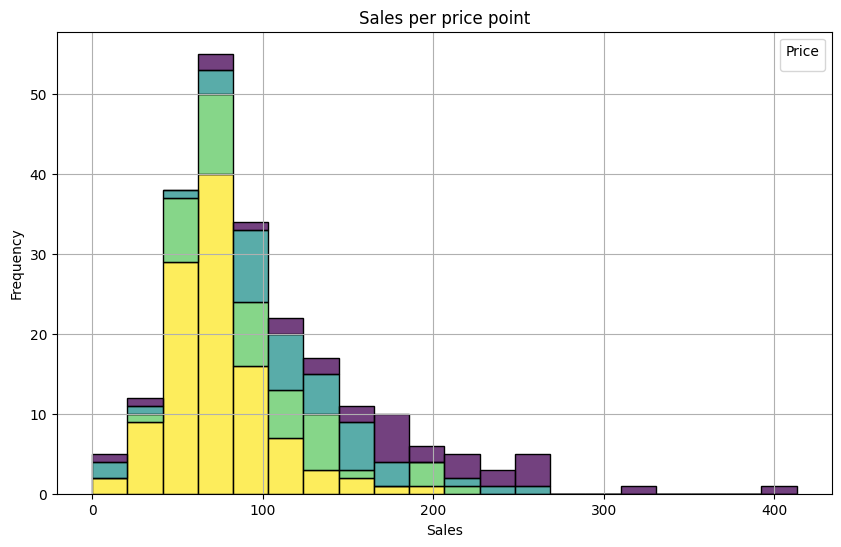

In [16]:
# all trials into one for analysis
all_trials = pd.concat(trials, ignore_index=True)

plt.figure(figsize=(10, 6))
sns.histplot(data=all_trials, x='Sales', hue='Price', multiple='stack', palette='viridis')
plt.title('Sales per price point')
plt.xlabel('Sales')
plt.ylabel('Frequency')
plt.legend(title='Price')
plt.grid(True)
plt.show()

/var/folders/zh/7hbjyl3x1y953yvj5t_7dbbw0000gn/T/ipykernel_31724/2765065988.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=all_trials, x='Price', y='Sales', palette='viridis')


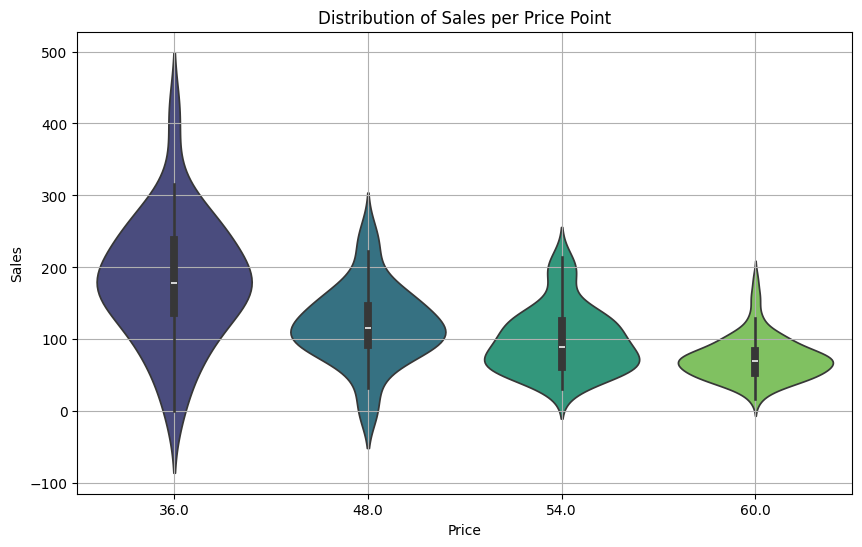

In [17]:
plt.figure(figsize=(10, 6))
sns.violinplot(data=all_trials, x='Price', y='Sales', palette='viridis')
plt.title('Distribution of Sales per Price Point')
plt.xlabel('Price')
plt.ylabel('Sales')
plt.grid(True)
plt.show()

#### probability of correlation between week# and the number of sales

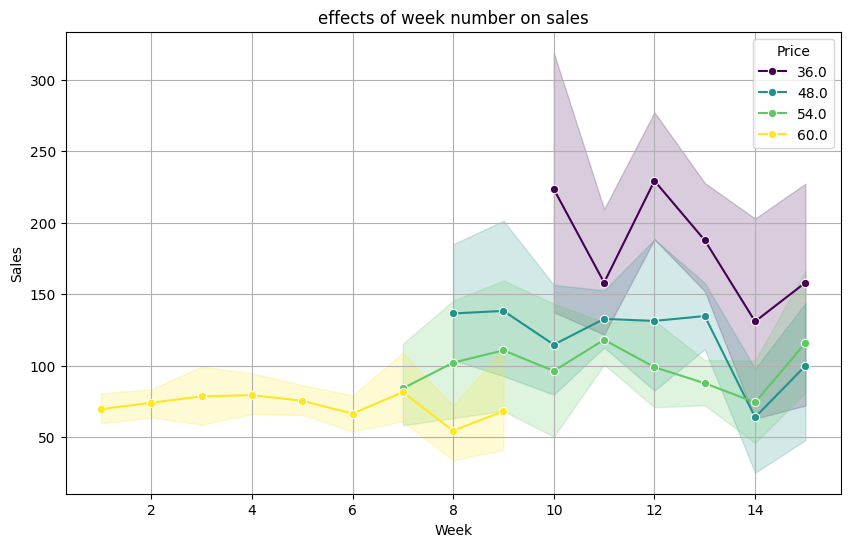

In [19]:
plt.figure(figsize=(10, 6))
sns.lineplot(data=all_trials, x='Week', y='Sales', hue='Price', palette='viridis', marker='o')
plt.title('effects of week number on sales')
plt.xlabel('Week')
plt.ylabel('Sales')
plt.legend(title='Price')
plt.grid(True)
plt.show()